# 🎈 인스타그램 태그

In [2]:
import requests
from bs4 import BeautifulSoup
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

In [3]:
driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

Input ID : ········
Input PWD : ········


In [4]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

## 태그 수집

In [114]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 전남나주


In [99]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(4)

In [115]:
tagCollect = []
count = 300
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        tagCollect.append(data[j].text.replace("#","")) # '#'없애기

    driver.find_element_by_css_selector("div.l8mY4.feth3").click() #다음 게시물로 이동
    time.sleep(3)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div.l8mY4.feth3"}
  (Session info: chrome=98.0.4758.102)


## 필요없는 태그들 잘라내기

In [125]:
stop_words = ["전라남도나주시","광주","전라도","전라도여행","나주카페","광주광역시","나주맛집","먹스타그램","맛스타그램","광양핫플","전남맛집","광양맛집","전남광양","칠곡","경북칠곡","경북","유성맛집","대전맛집","인천","마곡동","양천구","서대문구","은평구맛집","강서구", "연신내", "맛집", "반사", "soulcoachingoraclecards","서울은평구", "은평구", "임실여행","전북여행","전북임실","문의01066389905","입양문의01066389905타미맘","논산시","논산맛집","논산가볼만한곳","충남논산","논산여행","남양사거리","남양네일","화성남양","남양읍","서귀포시","제주여행","여행","제주도가볼만한곳","제주살이","제주도민","jeju","제주도맛집","제주도","제주시맛집","제주도카페추천","제주도먹방","제주도민추천맛집","제주도현지인맛집","제주도스타그램","제주현지인맛집","제주시가볼만한곳","제주카페","제주도카페","제주시","제주맛집","갤럭시노트20울트라","부산맛집","인스타굿","맞좋아요","오후","첫줄반사","월요일","좋아요램","좋튀","댓글","소통해요","주말","그냥","오랜만","일요일","오늘","디엠","데일리","꿀주말","휴무","선팔","경주충효동", "맞팔","팔로우이벤트","참여이벤트","대구","일상","southkorea","경산남천", "파주시","파주카페","경상남도진주","진주시","안성여행","안성시","likeforlikes","경기도안성","부산여행","부산북구","코로나로나갈수없는요즘","경상북도경주","경주여행","친구","부모님","댓글이벤트","응원이벤트","이벤트","강원도여행", "태백시", "강원도태백", "나주여행","전남나주","나주시","전라남도나주", "전라남도광양","좋아요테러","팔로워","좋아요반사","선팔환영","팔로우환영","선팔좋아요","맞팔좋아요","좋아요","선팔하면맞팔","팔로","팔로우미","선팔하면맞팔가요","팔로우","팔로잉","팔로미","선팔맞팔","소통","맞팔환영","노은동","지족동","대전유성","카톡","충남일수","20세이상누구나","계룡일수","세종일수","논산일수","공주일수","비밀보장","대전일수","대전중구","대전당일대출","대전달돈","대전개인돈","대전유성구","대전대덕구","대전서구","대전동구","대전일수", "대전급전","경상북도경산시","맞팔", "울산","경기도파주", "경기도", "파주", "경상북도", "경북", "경산", "대전", "유성", "전라남도", "전남", "광양", "나주", "강원도", "태백", "경주", "부산", "부산광역시", "북구", "안성", "경상남도", "경남", "진주", "제주", "화성", "칠곡", "충청남도", "충남", "논산", "전라북도", "전북", "임실", "서울","서울광역시", "은평","부산광역시강서구", "부산광역시사상구", "부산광역시북구"]
tagMost = [ i for i in tagCollect if i not in stop_words ]

print(tagMost)


['양수기펌프', '시골집🏡', '물청소💦', '시골마당', '물퍼내기', '고인물퍼내기', '농사용품', '양수기', '엔진펌프', '가뭄해결', '농수로', '우물', '우물안개구리', '장마', '홍수대비', '텃밭', '시골라이프', '고인물', '외할머니댁', '할매집', '시골집고치기', '나주다도', '나주곰탕', '수육', '노안집', '나주혁신도시', '오청명희고향', '8개월대장정끝', '아직절차가남았지만그래도좋다', '나주곰탕', '하얀집나주곰탕', '머선129', '나들이그램🌿', '나주카페추천', '화순카페추천', '광주가볼만한곳', '광주근교', '광주카페추천', '광주맛집', '나주은행나무길', '남평은행나무길', '나주카페마당', '지지티팟', '지지티팟', '금성관', '전국일주', '자동차전국일주', '전국여행', '무전여행', '차박여행', '오토캠핑', '솔로캠핑', '솔로차박', '차박캠핑', '미니멀캠핑', '여유', '동네한바퀴', '메타세콰이어길', '메타세콰이어길', '전국일주', '자동차전국일주', '전국여행', '무전여행', '차박여행', '차박캠핑', '미니멀캠핑', '여유', '동네한바퀴', '외할머니댁', '외할머니댁', '아들둘', '말썽쟁이들', '인라인전국대회', '무관중경기', '부산인라인', '인라인스케이트', '주말스타그램', '피곤타😂', '나주곰탕하얀집', '수육곰탕', '나주국밥맛집', '조식', 'jmt', '나주영산강', '나주영산강유채꽃', '하늘은흐려도', '사진작가님덕분', '올해의첫벚꽃놀이', '벚꽃길', '경현길', '경현동', '한수제', '한수제벚꽃길', '꽃구경🌸', '체력은쓰레기', '꽃구경도힘들군😔', '사람이되자', '보리굴비솥밥정식', '보리새우', '나주맛집인정', '나주맛집추천', '나주육회', '생고기비빔밥', '왕곡가든', '생활의달인맛집', '먹스타그램🍴', '신혼부부주말', '나주아파트', '송월동', '송월동아파트', '빛가람동아파

## 시각화

<BarContainer object of 30 artists>

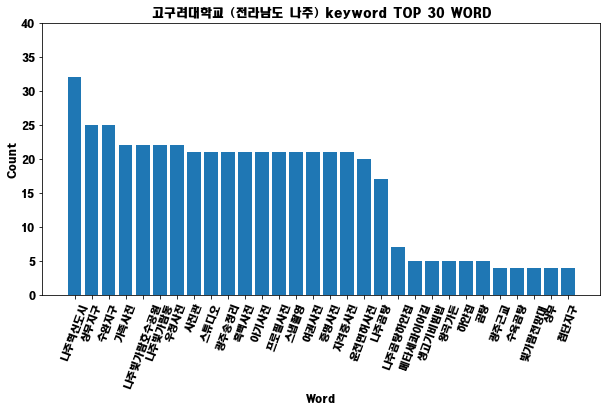

In [126]:
import nltk
 
results_str = " ".join(tagMost) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(30) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기 지정
plt.xlabel('Word') # X축 이름
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축 이름
plt.title('고구려대학교 (전라남도 나주) '+'keyword TOP '+str(count)+' WORD')
plt.ylim([0, 40]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.



## wordcloud

In [127]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:\Windows\Fonts\HMKMRHD.ttf",max_font_size=60).generate(results_str) # word cloud

(-0.5, 399.5, 199.5, -0.5)

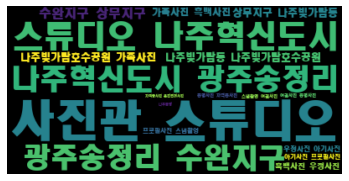

In [128]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 🎈게시글 위치정보

In [59]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경상북도경주


In [60]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [46]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

['', '2021-12-13', 0, '忍城', []]

In [48]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('div.l8mY4.feth3')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [64]:
# 크롤링 결과를담을 리스트 생성
result = [ ]


# 여러 게시글 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [101]:
resultFrame = pd.DataFrame(result)
resultFrame[3].replace('', np.nan, inplace=True)
resultFrame[[3]].dropna(axis=0)

,3
0,경주 맷돌 순두부
1,경주 황리단길
2,경상북도 경주
3,경상북도 경주
5,경상북도 경주
6,경상북도 경주
7,경주 황리단길
8,경주 황리단길
9,경상북도 경주
12,셀세모


# 🎈 위치, 태그

In [18]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re

from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + str(word)
    return url

def select_first(driver):
    driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()  # 첫번째 게시물 열기
    time.sleep(5)

def get_content(driver):
    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.e1e1d')[1].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    
    # 해시태그
    tags = soup.select('a.xil3i')

    # 작성일자
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    # 좋아요
    try :
        like = soup.select('a.zV_Nj')[0].text[4:-1]
    except :
        like = 0

    # 위치
    try :
        place = soup.select('div.M30cS')[0].text
    except :
        place = ''

    data = [content, date, like, place, tags]
    return data

def move_next(driver) :
    driver.find_element_by_css_selector("div.l8mY4.feth3").click()  # 다음 게시물로 이동
    time.sleep(3)

path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5)

word = input('태그 입력 : ')
word = str(word)
url = insta_searching(word)

driver.get(url)
time.sleep(8)

select_first(driver)

results = []
target = 300
for i in range(target):

    try :
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except :
        time.sleep(2)
        move_next(driver)

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']

Input ID : ········
Input PWD : ········
태그 입력 : 강원도태백


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 원본데이터

In [19]:
results_df

,content,date,like,place,tags
0,,2020-04-30,0,강원도 태백 함백산 정상,"[[#계획도없던함백산], [#함백산], [#왕복10시간운전], [#집에오니1시반], [#강원도는아직겨울], [#강원도태백], [#산스타그램], [#등산스타그램], [#산타는남자], [#산], [#등산], [#산행], [#배나온아저씨보다그냥아저씨가되자], [#나무늘보수노]]"
1,,2020-06-14,0,한강의 발원지 검룡소,"[[#대덕산], [#강원도태백], [#푸릇푸릇🌱], [#하늘이쁜날], [#살방살방산행], [#해발1307m], [#횡단산행], [#일상], [#데일리], [#강원도], [#한강의발원지], [#검룡소], [#금대봉], [#백두대간두문동재], [#산에서힐링], [#좋은공기듬뿍], [#좋은곳눈에담고], [#산에서노는게제일재밌어], [#함께해요❤️], [#등산스타그램🌲🌳🌿], [#레츠꼬우👉], [#클라터뮤젠], [#한바그알래스카], [#미스테리렌치]]"
2,,2021-06-22,0,,"[[#강원도태백], [#태백여행], [#태백은하수], [#태백별자리], [#독수리자리], [#탄탄파크], [#별천지], [#오로라], [#은하수여권], [#별자리여권]]"
3,,2022-01-12,0,함백산정상,"[[#등산정보], [#강원도태백], [#함백산]]"
4,,2022-01-10,0,태백 매봉산 바람의 언덕,"[[#누워뜨는곰], [#강원도태백], [#강원도], [#여행], [#태백여행], [#태백], [#고냉지], [#배추밭], [#춥다], [#겨울여행], [#여행지], [#겨울여행], [#겨울], [#바람의언덕], [#태백바람의언덕], [#매봉산], [#풍력발전소], [#혼자하는여행], [#폰카], [#배추], [#인스타그램], [#여행그램], [#나의일기장], [#나의하루], [#여행일기], [#여행기록], [#좋아요], [#추천], [#먹방일기], [#소통해요]]"
5,,2021-07-23,0,,"[[#강원도태백], [#태백], [#태백여행], [#태백은하수], [#은하수여권], [#이벤트에], [#참여해주신], [#모든분들], [#감사드립니다❤️]]"
6,,2021-08-03,0,,[[#강원도태백]]
7,,2022-02-07,0,강원도 태백,"[[#강원도태백], [#몽토랑], [#눈좀더마니오면_진짜예쁠듯], [#담엔좀더_겨울나들이복장으로😂]]"
8,,2021-03-11,0,강원도 태백,"[[#mcdingdong], [#mc딩동], [#엠씨딩동], [#딩동], [#MC], [#딩동해피컴퍼니], [#딩동해피컴퍼니대표], [#행사의신], [#행사계의유재석], [#사전mc계의유재석], [#행사mc], [#사전mc], [#mc섭외1순위], [#mc섭외], [#딩동캠핑], [#캠핑카], [#캠핑카갖고싶다], [#포드캠핑카], [#강원도태백], [#딩동은녹화중], [#즐거운촬영], [#함께해요딩동], [#역시진행은mc딩동], [#요즘잘나가는mc딩동], [#mc딩동공식팬클럽], [#딩커벨], [#딩동님의밤하늘🌙🌠], [#딩커벨이응원해요💪💪]]"
9,,2022-02-20,0,,"[[#태백산], [#강원도], [#강원도태백], [#등린이], [#산쟁이], [#등산], [#등산하는남자], [#운동], [#운동하는남자], [#소모임], [#인천클라스], [#인클], [#장군봉], [#천제단]]"


## 가공 데이터 1

In [20]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max.colwidth', 1000)

results_df2 = results_df.set_index("place")
results_df3 = results_df2[["tags"]]
results_df3

,tags
place,
강원도 태백 함백산 정상,"[[#계획도없던함백산], [#함백산], [#왕복10시간운전], [#집에오니1시반], [#강원도는아직겨울], [#강원도태백], [#산스타그램], [#등산스타그램], [#산타는남자], [#산], [#등산], [#산행], [#배나온아저씨보다그냥아저씨가되자], [#나무늘보수노]]"
한강의 발원지 검룡소,"[[#대덕산], [#강원도태백], [#푸릇푸릇🌱], [#하늘이쁜날], [#살방살방산행], [#해발1307m], [#횡단산행], [#일상], [#데일리], [#강원도], [#한강의발원지], [#검룡소], [#금대봉], [#백두대간두문동재], [#산에서힐링], [#좋은공기듬뿍], [#좋은곳눈에담고], [#산에서노는게제일재밌어], [#함께해요❤️], [#등산스타그램🌲🌳🌿], [#레츠꼬우👉], [#클라터뮤젠], [#한바그알래스카], [#미스테리렌치]]"
,"[[#강원도태백], [#태백여행], [#태백은하수], [#태백별자리], [#독수리자리], [#탄탄파크], [#별천지], [#오로라], [#은하수여권], [#별자리여권]]"
함백산정상,"[[#등산정보], [#강원도태백], [#함백산]]"
태백 매봉산 바람의 언덕,"[[#누워뜨는곰], [#강원도태백], [#강원도], [#여행], [#태백여행], [#태백], [#고냉지], [#배추밭], [#춥다], [#겨울여행], [#여행지], [#겨울여행], [#겨울], [#바람의언덕], [#태백바람의언덕], [#매봉산], [#풍력발전소], [#혼자하는여행], [#폰카], [#배추], [#인스타그램], [#여행그램], [#나의일기장], [#나의하루], [#여행일기], [#여행기록], [#좋아요], [#추천], [#먹방일기], [#소통해요]]"
,"[[#강원도태백], [#태백], [#태백여행], [#태백은하수], [#은하수여권], [#이벤트에], [#참여해주신], [#모든분들], [#감사드립니다❤️]]"
,[[#강원도태백]]
강원도 태백,"[[#강원도태백], [#몽토랑], [#눈좀더마니오면_진짜예쁠듯], [#담엔좀더_겨울나들이복장으로😂]]"
강원도 태백,"[[#mcdingdong], [#mc딩동], [#엠씨딩동], [#딩동], [#MC], [#딩동해피컴퍼니], [#딩동해피컴퍼니대표], [#행사의신], [#행사계의유재석], [#사전mc계의유재석], [#행사mc], [#사전mc], [#mc섭외1순위], [#mc섭외], [#딩동캠핑], [#캠핑카], [#캠핑카갖고싶다], [#포드캠핑카], [#강원도태백], [#딩동은녹화중], [#즐거운촬영], [#함께해요딩동], [#역시진행은mc딩동], [#요즘잘나가는mc딩동], [#mc딩동공식팬클럽], [#딩커벨], [#딩동님의밤하늘🌙🌠], [#딩커벨이응원해요💪💪]]"


## 어떤 지역이 가장 많이 count 되었는지

In [21]:
results_df.groupby(by=['place'], as_index=False).count().sort_values(by='tags', ascending=False)

,place,content,date,like,tags
0,,153,153,153,153
6,강원도 태백,34,34,34,34
20,몽토랑,19,19,19,19
34,태백산국립공원,9,9,9,9
10,강원도 태백시,7,7,7,7
46,함백산,7,7,7,7
21,오투cc,5,5,5,5
49,해발 1330m 만항재 하늘공원,4,4,4,4
32,태백산 (Taebaek-san/太白山),4,4,4,4
33,태백산 천제단,3,3,3,3


## 지역별로 추출

In [34]:
condition = (results_df.place == '태백산 (Taebaek-san/太白山)')
results_df4 = results_df.loc[condition, ['place', 'tags']]
results_df4


,place,tags
17,태백산 (Taebaek-san/太白山),"[[#강원도], [#강원도태백], [#태백시], [#태백산], [#태백산국립공원], [#장군봉], [#천제단], [#설산], [#겨울산행], [#등산], [#등산스타그램], [#등산복패션], [#등린이], [#산], [#산스타그램], [#산꾼도시여자들], [#산악인], [#산린이], [#백대명산], [#블랙야크100대명산], [#fjallraven], [#arkteryx], [#k2]]"
23,태백산 (Taebaek-san/太白山),[]
129,태백산 (Taebaek-san/太白山),"[[#태백산], [#산태기극복]]"
138,태백산 (Taebaek-san/太白山),"[[#태백산], [#태백겨울산행], [#당골코스로], [#천제단풍경], [#맑은뷰], [#너무멋지다👍], [#눈산행], [#영하17도실화냐😱], [#mountain], [#mountainlife], [#memories💕😍], [#등산], [#겨울산행의매력], [#겨울산🗻], [#강원도태백], [#피엘라벤], [#피엘라벤자켓]]"


In [31]:
results_df4.drop([results_df4.index[5],results_df4.index[5],results_df4.index[5],results_df4.index[5]])

,place,tags
12,함백산,"[[#20220219], [#강원도], [#정선], [#태백], [#강원도정선], [#강원도태백], [#함백산], [#함백산정상], [#만항재쉼터]]"
21,함백산,"[[#오하운], [#겨울산행], [#산행], [#이혜성다이아몬드팀유닛], [#등산], [#등린이], [#산], [#함백산], [#중함백], [#블야인증], [#봄인줄], [#강원도태백], [#일상], [#소통], [#1박2일], [#씐나씐나], [#태백산맥], [#눈꽃산행], [#산스타그램], [#등산그램], [#운동], [#만항재]]"
51,함백산,"[[#태백산국립공원], [#태백산], [#함백산], [#등린이], [#등산스타그램], [#커플스타그램], [#강원도태백], [#태백], [#국립공원스탬프투어], [#100대명산], [#100대명산도전중], [#태백산앓이], [#백두대간], [#태백산맥], [#우리나라7번째로높은산], [#추억], [#등산], [#강원20좌], [#BGM], [#태연], [#All]]"
61,함백산,"[[#함백산], [#블랙야크100대명산], [#강원도], [#강원도태백], [#태백], [#강원도태백시], [#태백산], [#함백산], [#강원도명산], [#명산], [#블랙야크100대명산], [#블야100대명산], [#블야인증], [#블랙야크알파인클럽], [#일출], [#일출산행], [#함백산일출], [#함백산일출산행], [#겨울등산], [#일출맛집], [#등린이], [#등산], [#등산스타그램], [#창원등산], [#강원도등산], [#등산복패션], [#등산복코디], [#등산취미], [#취미생활]]"
72,함백산,"[[#등산], [#등산스타그램], [#산스타그램], [#🏔], [#태백], [#태백산국립공원], [#강원도태백], [#함백산], [#함백산정상], [#함백산만항재], [#만항재], [#만항재쉼터], [#연화산], [#투구봉], [#블랙야크100대명산], [#블랙야크100대명산플러스], [#블랙야크bac], [#블랙야크알파인클럽], [#blackyakalpineclub]]"
262,함백산,"[[#향유], [#elsholtzia_ciliata], [#꿀풀과], [#야생화], [#korean_wildflowers], [#함백산], [#hambaeksan_mountain], [#태백산국립공원], [#taebaeksan_national_park], [#2011년9월], [#강원도태백]]"


# 엑셀 파일로 넘기기

In [1]:
# 매개 변수로 저장할 파일 이름을 전달합니다.
results_df4.to_excel('웅지세무대(경기도파주)-퍼스트가든.xlsx',index=False)

NameError: name 'results_df4' is not defined